### Telecom X - Análise de Evasão de Clientes.
##### A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.  
##### Neste projeto, realizamos a extração, tratamento e carga dos dados (ETL), além de uma análise exploratória para identificar 
##### padrões e perfis associados à evasão.  

##### O objetivo do projeto é oferecer **insights acionáveis** que ajudem a empresa a reduzir o churn e fidelizar sua base de clientes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Extração e Normalização dos Dados

##### Os dados foram fornecidos no formato JSON com estrutura aninhada. Algumas colunas, como `customer`, `account`, `internet`, entre outras, continham subcampos em formato de dicionário.

##### Para facilitar a análise, se fez necessária a **normalização** desses campos, transformando-os em colunas planas utilizando `pd.json_normalize()`. Isso nos permitiu acessar diretamente atributos como `customer_Tenure`, `account_Contract`, `internet_OnlineSecurity`, entre outros.

#### Exemplo de transformação:
##### antes: json {"customer": {'gender': 'Female', 'SeniorCitizen': 0,}}



In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df = pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1), #excluir as colunas agrupadas
    pd.json_normalize(df['customer']).add_prefix('customer_'),     #normalizar a coluna customer, mantendo o prefixo "cutomer_"
    pd.json_normalize(df['phone']).add_prefix('phone_'),           #normalizar a coluna phone, mantendo o prefixo "phone_"
    pd.json_normalize(df['internet']).add_prefix('internet_'),     #normalizar a coluna internet, mantendo o prefixo "internet_"
    pd.json_normalize(df['account']).add_prefix('account_'),       #normalizar a coluna account, mantendo o prefixo "account_"
], axis=1)

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#### Tratamento e seleção das variáveis relevantes

##### Para a análise da evasão de clientes (churn), algumas colunas do DataFrame se mostram especialmente relevantes com base no contexto de negócio e em hipóteses iniciais:

##### - **`Churn`** — Esta é a variável-alvo. É a partir dela que entenderemos quais perfis estão mais associados ao cancelamento do serviço.
##### - **`customer_tenure`** — Representa o tempo de permanência do cliente. Permanências curtas costumam estar associadas a maior probabilidade de churn.
##### - **`account_Contract`** — Clientes com contratos mensais tendem a ter maior risco de cancelamento, pois não estão fidelizados por longo prazo.
##### - **`account_Charges.Monthly`** — Clientes com mensalidades mais altas podem ter expectativas maiores em relação ao serviço, o que pode influenciar sua decisão de cancelar.
##### - **`account_Charges.Total`** — O valor total pago ao longo do tempo ajuda a identificar clientes antigos que mesmo assim decidem sair — isso pode indicar uma queda de satisfação ao longo do tempo.
##### - **`internet_*` (todas as colunas)** — O tipo de serviço contratado (e serviços adicionais como segurança ou backup) afeta a percepção de valor. A ausência desses adicionais pode ser um sinal de risco.
##### - **`account_PaymentMethod`** — Métodos de pagamento automáticos tendem a reduzir o churn, possivelmente por eliminar barreiras no processo de pagamento.
##### - **`phone_PhoneService`** — A presença ou não de telefone fixo pode refletir diferentes perfis demográficos, como clientes mais jovens ou mais antigos.
##### - **`customer_gender`** — Pode haver variações no churn entre homens e mulheres, mas a expectativa é de que não seja um fator preditivo forte. Ainda assim, será analisado.

#### Verificando se existem valores duplicados em `Customer ID`

In [5]:
df['customerID'].is_unique

True

##### A existência de valores duplicados na coluna `customer_ID` poderia indicar registros repetidos para o mesmo cliente — algo que comprometeria a análise.

##### Nenhuma duplicata foi encontrada, o que garante que cada linha representa um cliente único.

#### Checando a integridade de valores na coluna `Churn`

In [6]:
(df['Churn'].str.strip() == '').sum() #descobrindo quantas linhas estão vazias.

224

In [7]:
empty_lines = df[df['Churn'].str.strip() == '']

empty_lines

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [8]:
nulls = df['Churn'].isna().sum()
empty = (df['Churn'].astype(str).str.strip() == '').sum()
df_len = len(df)

percent = ((nulls + empty)/ df_len) * 100

print(f"Linhas com valores ausentes em 'Churn': {nulls + empty}")
print(f"Representando {percent:.2f}% do Total de linhas")


Linhas com valores ausentes em 'Churn': 224
Representando 3.08% do Total de linhas


In [9]:
df = df[df['Churn'].notna()] #remove as linhas onde os valores são nulos em Nan (ainda que a ferramenta indique que não existem).
df = df[df['Churn'].str.strip() != ''] #remove as linhas sem valor.

(df['Churn'].str.strip() == '').sum() #checando se totdos os valores vazios foram extraídos.

0

#### Tratamento de valores ausentes na coluna `Churn`

##### Durante a análise exploratória, foi identificada a ausência de **224 valores** na coluna, o que representa aproximadamente **3,08% do total de registros**.

##### Essa ausência é inesperada**, pois esta é a variável-alvo da análise, ela que indica se o cliente rescindiu ou não o contrato com a empresa.

##### Por se tratar de uma **informação factual** (ou seja, o cliente efetivamente cancelou ou não), não é possível inferir ou imputar esses valores de forma segura.

##### **Decisão**: as linhas com valores ausentes em `Churn` foram **removidas do DataFrame**, garantindo que a análise seja baseada apenas em registros com informação completa sobre evasão.


#### Checando valores nulos ou ausentes nas outras colunas que utilizarei.

In [10]:
df['customer_tenure'].isna().sum()

0

In [11]:
(df['account_Contract'].str.strip() == '').sum()

0

In [12]:
df['account_Charges.Monthly'].isna().sum()

0

In [13]:
(df['account_Charges.Monthly'] == 0.00).sum() #verificando se existe algum valor contratado igual a 0 no data frame

0

In [17]:
(df['internet_InternetService'].str.strip() == '').sum()

0

In [18]:
(df['internet_OnlineSecurity'].str.strip() == '').sum()

0

In [19]:
(df['internet_OnlineBackup'].str.strip() == '').sum()

0

In [20]:
(df['internet_DeviceProtection'].str.strip() == '').sum()

0

In [21]:
(df['internet_TechSupport'].str.strip() == '').sum()

0

In [22]:
(df['internet_StreamingTV'].str.strip() == '').sum()

0

In [23]:
(df['internet_StreamingMovies'].str.strip() == '').sum()

0

In [24]:
(df['account_PaymentMethod'].str.strip() == '').sum()

0

In [25]:
(df['customer_gender'].str.strip() == '').sum()

0

In [26]:
(df['phone_PhoneService'].str.strip() == '').sum()

0

##### Nenhum valor nulo ou ausente foi identificado nessas colunas.
##### Com isso, não foi necessário aplicar nenhum tratamento adicional de preenchimento ou exclusão de registros nesta etapa.

#### Verificação da coluna `account_Charges.Total`

In [14]:
(df['account_Charges.Total'].str.strip() == '').sum()

11

In [15]:
empty_lines = df[df['account_Charges.Total'].str.strip() == '']


##### Ajuste na coluna `account_Charges.Total`

##### A coluna `account_Charges.Total` representa o valor total faturado por cliente até o momento da análise. Esse valor é, em regra, o resultado da multiplicação entre `account_Charges.Monthly` e `customer_tenure`.

##### Durante a checagem, foram encontrados **11 registros sem valor** nessa coluna, mesmo com valor positivo em `account_Charges.Monthly`.

##### Observação: em todos os casos, o campo `customer_tenure` era igual a 0, o que indica que o cliente ainda **não completou o primeiro mês de uso**. Portanto, é **esperado que o total faturado seja zero**, já que para esses clientes ainda **não foram geradas cobranças recorrentes**.

##### Decisão: acrescentar o valor **0.00** nesses casos.

##### Além disso, como `account_Charges.Total` representa um valor monetário, a coluna foi convertida para o tipo **float**, garantindo a consistência dos tipos de dados para análises numéricas e agregações futuras.


In [16]:
df['account_Charges.Total'] = df['account_Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0.00)
df['account_Charges.Total'] = df['account_Charges.Total'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

#### Padronização de valores e preparação da base

##### Nesta etapa, será realizada a **padronização de valores categóricos** que estavam descritos de forma diferente de `'Yes'` ou `'No'`, a fim de manter a consistência semântica da base e evitar interpretações ambíguas nos gráficos e análises.

##### Em seguida, será criado um **novo DataFrame contendo apenas as colunas relevantes** para a análise exploratória, com o objetivo de trabalhar com um subconjunto mais limpo e focado dos dados.

##### Também foi criada uma nova coluna, chamada `account_Charges.Daily`, que representa o valor diário da conta mensal. Esta métrica poderá ser útil futuramente para investigações adicionais de consumo proporcional ao tempo de permanência.


In [27]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [28]:
#criando um novo df somente com as colunas a serem usadas

columns = ['customerID',
    'Churn',
    'customer_gender',
    'customer_tenure',
    'phone_PhoneService',
    'internet_InternetService',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_Contract',
    'account_PaymentMethod',
    'account_Charges.Monthly',
    'account_Charges.Total']

df_churn = df[columns].copy()

In [29]:
# Criando a coluna Contas diárias.

df_churn['account_Charges.Daily'] = (df_churn['account_Charges.Monthly']/30).round(2) 
df_churn.head()

,customerID,Churn,customer_gender,customer_tenure,phone_PhoneService,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
0,0002-ORFBO,No,Female,9,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,9,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,4,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,13,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,3,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Mailed check,83.9,267.40,2.80


### Análise Exploratória (EDA)

#### Distribuição de Churn.

##### Antes de investigar os fatores relacionados ao cancelamento, é importante entender **como está distribuída a variável-alvo `Churn`**.

##### Essa distribuição tem o objetivo de ajudar a:
##### - Compreender o **equilíbrio (ou desequilíbrio)** da base de dados.
##### - Saber se estamos lidando com uma **base balanceada ou desbalanceada**, o que pode impactar decisões futuras de modelagem.
##### - Ter uma visão inicial da **proporção de clientes que permanecem versus os que cancelam**.

##### A seguir, demonstro a distribuição percentual da taxa de Churn.

In [30]:
(df_churn.describe()).round(2)

,customer_tenure,account_Charges.Monthly,account_Charges.Total,account_Charges.Daily
count,7043.00,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.73,2.16
std,24.56,30.09,2266.79,1.00
min,0.00,18.25,0.00,0.61
25%,9.00,35.50,398.55,1.18
50%,29.00,70.35,1394.55,2.34
75%,55.00,89.85,3786.60,2.99
max,72.00,118.75,8684.80,3.96


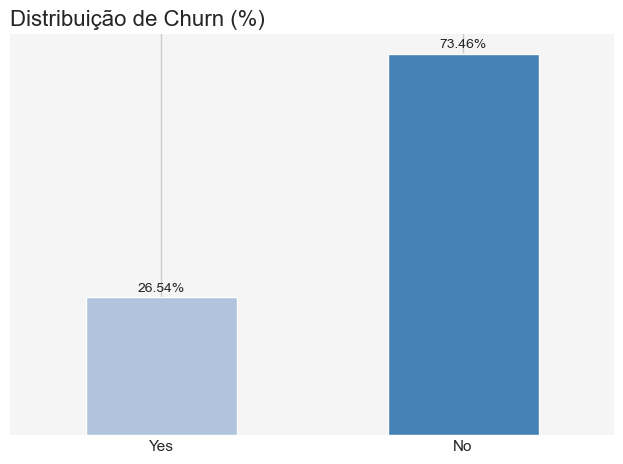

In [113]:
churn_count = df_churn['Churn'].value_counts(normalize=True).sort_index()
churn_count = churn_count.loc[['Yes', 'No']]
colors = ['lightsteelblue', 'steelblue']

ax = churn_count.plot(kind='bar', color=colors, rot=0)
ax.set_facecolor('whitesmoke')
ax.set_title('Distribuição de Churn (%)', loc='left', fontsize=16)
ax.set_xlabel('')
ax.set_yticks([])
ax.tick_params(axis='x', length=0)

for i, valor in  enumerate(churn_count):
    percent = f"{valor*100:.2f}%"
    ax.text(i, valor+ 0.01, percent, ha='center', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('grafico_distribuicao_churn.png', dpi=300, bbox_inches='tight')
plt.show()

In [58]:
num_churn = df_churn[df_churn['Churn'] == 'Yes'].shape[0]
total = df_churn.shape[0]
churn_rate = (num_churn/total) * 100

print(f"Taxa de Churn: {churn_rate:.2f}%")

Taxa de Churn: 26.54%


##### A taxa de churn identificada na base de dados é de **26,54%**, o que indica que **aproximadamente 1 em cada 4 clientes cancela o serviço**.

##### Em contrapartida, **73,46% dos clientes permanecem ativos**.

##### Essa proporção demonstra uma **base majoritariamente fiel**, mas com um nível de evasão considerável — o suficiente para justificar uma investigação aprofundada sobre **quais perfis estão mais propensos a abandonar o serviço**.


#### Comparação de perfil dos clientes.
##### Abaixo, apresentamos a média de três variáveis numéricas para os dois grupos (`Churn = No` e `Churn = Yes`):

In [32]:
(df_churn.groupby('Churn')[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].mean()).round(2)

,customer_tenure,account_Charges.Monthly,account_Charges.Total
Churn,,,
No,37.57,61.27,2549.91
Yes,17.98,74.44,1531.80


#### Interpretação:

##### - **Tempo de permanência:** clientes que cancelam tendem a sair **bem antes** (em média, após ~18 meses), enquanto os que permanecem já estão em média há mais de 3 anos com a empresa.
##### - **Mensalidade:** os clientes que cancelam pagam **valores mensais mais altos**, o que pode indicar **expectativas maiores em relação à qualidade do serviço**.
##### - **Total acumulado:** apesar da mensalidade ser mais alta, clientes que cancelam **pagaram menos no total**, justamente porque ficaram menos tempo na empresa.

##### Esses dados sugerem que o churn está mais associado a **clientes recentes e com contratos de maior valor**, o que levanta hipóteses sobre **insatisfação inicial ou dificuldade de retenção nos primeiros meses**.


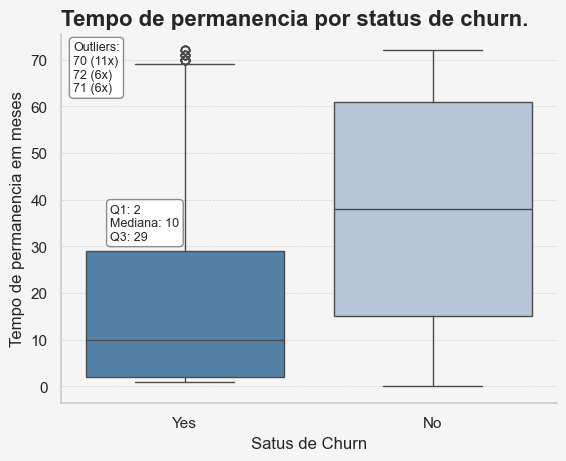

In [114]:
sns.set(style= 'whitegrid')
order = ['Yes', 'No']

ax = sns.boxplot(
    x = 'Churn',
    y = 'customer_tenure',
    hue='Churn',
    data = df_churn,
    order = order,
    palette = {'No': 'lightsteelblue', 'Yes': 'steelblue'},
    legend=False
)

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
sns.despine(top=True, right=True)
plt.title('Tempo de permanencia por status de churn.', fontsize=16, loc='left', weight='bold')
ax.set_xlabel('Satus de Churn')
ax.set_ylabel('Tempo de permanencia em meses')

yes_data = df_churn[df_churn['Churn']== 'Yes']['customer_tenure']

q1 = np.percentile(yes_data, 25)
q2 = np.percentile(yes_data, 50)
q3 = np.percentile(yes_data, 75)
iqr = q3 - q1 #intervalo interquartil
outliers = yes_data[(yes_data < q1 - 1.5 * iqr) | (yes_data > q3 + 1.5 * iqr)]


x_pos = 0 

annotation_text = f"Q1: {q1:.0f}\nMediana: {q2:.0f}\nQ3: {q3:.0f}"
ax.annotate(
    annotation_text,
    xy= (x_pos, q3 + 5),
    xytext= (x_pos - 0.3, q3 + 6),
    textcoords = 'data',
    bbox = dict(boxstyle='round, pad=0.3', fc='white', ec='gray', alpha=0.9),
    fontsize=9,
    ha='left',
    va='center'
    )

outliers_counts = outliers.value_counts()
outlier_text = f"Outliers:\n" + "\n".join([f"{val:.0f} ({count}x)" for val, count in outliers_counts.items()])
ax.annotate(
    outlier_text,
    xy=(x_pos, outliers.max()),
    xytext=(x_pos - 0.45, outliers.max() + 2),
    textcoords='data',
    bbox=dict(boxstyle='round, pad=0.3', fc='white', ec='gray', alpha=0.9),
    fontsize=9,
    ha='left',
    va='top'
)

ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)
plt.savefig('grafico_permanencia_por_Churn.png', dpi=300, bbox_inches='tight')
plt.show()

#### Tempo de permanência X Churn

##### O gráfico acima mostra a distribuição do tempo de permanência dos clientes (`customer_tenure`) em relação ao churn.

##### **Principais observações:**

##### - A **mediana de permanência dos clientes que cancelam (`Yes`) é de apenas 10 meses**, enquanto para os que permanecem (`No`) é de 38 meses aproximadamente.
##### - A dispersão dos clientes que permanecem é maior, com muitos deles ficando acima de 60 meses.
##### - O grupo de churn apresenta **vários outliers próximos ao limite superior (70, 71, 72 meses)** — sugerindo que uma pequena parte dos clientes antigos também decide sair.
##### - A **distribuição assimétrica** e o grande número de valores baixos para churn indicam que **a maior parte dos cancelamentos acontece nos primeiros meses de contrato**.

##### **Conclusão:** há uma clara relação entre **tempo curto de permanência** e **maior probabilidade de churn**. Isso reforça a importância de ações de retenção logo nos primeiros meses após a adesão do cliente.


In [34]:
contract = (pd.crosstab(df_churn['account_Contract'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

contract

Churn,No,Yes
account_Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


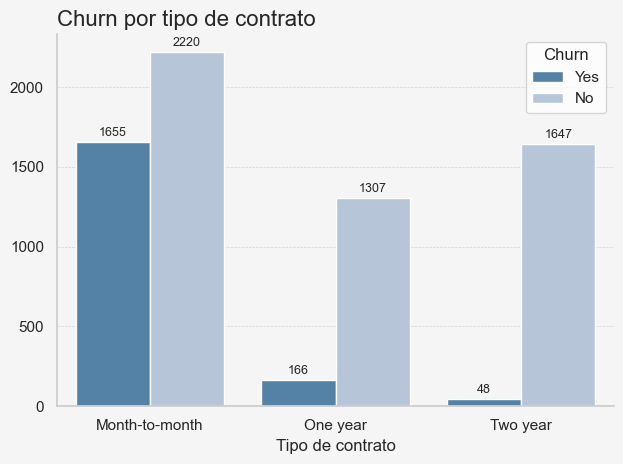

In [115]:
order = (df_churn[df_churn['Churn'] == 'Yes']
         ['account_Contract'].value_counts()
         .sort_values(ascending=False).index)

palette = {'Yes': 'steelblue', 'No': 'lightsteelblue'}

ax = sns.countplot(
    x='account_Contract',
    hue='Churn',
    data=df_churn,
    palette=palette,
    hue_order=['Yes', 'No'],
    order=order
)

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
ax.set_ylabel('')
ax.set_xlabel('Tipo de contrato', fontsize=12)
plt.title('Churn por tipo de contrato', loc='left', fontsize=16)
sns.despine(top=True, right=True)



for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=9)

ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_churn_tipo_contrato.png', dpi=300, bbox_inches='tight')
plt.show()


#### Relação entre tipo de contrato e churn

##### O gráfico acima mostra a distribuição de cancelamentos (`Churn`) em relação ao tipo de contrato firmado com a empresa:

##### **Principais observações:**

##### - A **grande maioria dos cancelamentos ocorre entre clientes com contrato mensal** (`Month-to-month`), representando cerca de **92% dos casos de churn**.
##### - Os clientes com contratos de **1 ano ou 2 anos** apresentam **índices muito menores de evasão**.
##### - O número de clientes que permanecem cresce proporcionalmente com a duração do contrato, o que sugere **um efeito de fidelização**.

#####  **Conclusão:** clientes que optam por contratos mais longos estão muito menos propensos a cancelar. Isso pode indicar:
##### - Maior comprometimento com o serviço
##### - Descontos ou benefícios em contratos longos
##### - Possível perfil de cliente mais estável e satisfeito

##### **Insight de negócio:** a empresa pode considerar **incentivar a migração para contratos anuais ou bienais**, especialmente para novos clientes, como forma de reduzir o churn.


#### Relação entre método de pagamento e churn

In [36]:
pay_method = (pd.crosstab(df_churn['account_PaymentMethod'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

pay_method

Churn,No,Yes
account_PaymentMethod,,
Electronic check,1294,1071
Mailed check,1304,308
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232


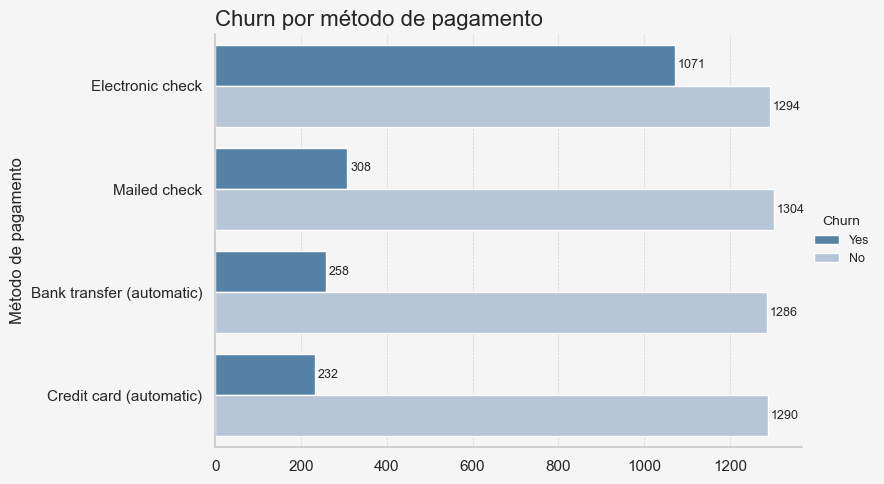

In [116]:
order = (
    df_churn[df_churn['Churn'] == 'Yes']
    ['account_PaymentMethod']
    .value_counts()
    .sort_values(ascending=False)
    .index
)

palette = {'Yes': 'steelblue', 'No': 'lightsteelblue'}

fig, ax = plt.subplots(figsize=(9,5))

ax = sns.countplot(
    y='account_PaymentMethod',
    hue='Churn',
    data=df_churn,
    palette=palette,
    hue_order=['Yes', 'No'],
    order=order,
    ax=ax
)

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
ax.set_ylabel('Método de pagamento', fontsize=12)
ax.set_xlabel('')
plt.title('Churn por método de pagamento', loc='left', fontsize=16)
sns.despine(top=True, right=True)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=9)

ax.legend(title='Churn',
          loc='center left',
          bbox_to_anchor=(1.0,0.5),
          frameon=False,
          fontsize=9,
          title_fontsize=10
          )

ax.xaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.savefig('grafico_churn_metodo_pagamento.png', dpi=300, bbox_inches='tight')
plt.show()


##### O gráfico acima mostra a distribuição dos clientes de acordo com o método de pagamento utilizado e o status de churn:
##### **Observações:**

##### - O método **“Electronic check”** concentra **mais de 40% de todos os cancelamentos**.
##### - Os métodos **automáticos** (cartão de crédito e transferência bancária) apresentam **baixas taxas absolutas de churn**, mesmo com número similar de clientes.
##### - **Pagamentos manuais** (como `Electronic check` e `Mailed check`) estão mais associados ao cancelamento.

##### **Conclusão:** há uma **correlação negativa entre churn e o uso de métodos de pagamento automáticos** — ou seja, quem adere a pagamentos automáticos tende a **permanecer mais tempo com a empresa**.

##### **Insight de negócio:** incentivar o uso de métodos automáticos (com descontos, brindes ou campanhas educativas) pode ajudar a **reduzir a evasão**.


In [117]:
internet_serv = (pd.crosstab(df_churn['internet_InternetService'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

internet_serv['Total']= internet_serv['Yes'] + internet_serv['No']

internet_serv['Churn Rate (%)'] = (internet_serv['Yes']/internet_serv['Total'] * 100).round(2)

internet_serv

Churn,No,Yes,Total,Churn Rate (%)
internet_InternetService,,,,
Fiber optic,1799,1297,3096,41.89
DSL,1962,459,2421,18.96
No,1413,113,1526,7.40


#### Relação entre tipo de serviço de internet e churn

##### A princípio, o serviço de `Fiber optic` aparenta concentrar a maior parte dos cancelamentos. No entanto, como esse também é o serviço com o maior número total de clientes, é importante analisar a **taxa de churn proporcional** por tipo de serviço:
##### **Observações:**

##### - Clientes com **serviço de fibra óptica** apresentam **a maior taxa de churn proporcional**, mesmo sendo maioria.
##### - Já os clientes com DSL ou sem internet têm taxas de cancelamento significativamente mais baixas.
##### - Isso pode indicar que, apesar da superioridade técnica da fibra, algo na **experiência percebida**, **atendimento** ou **precificação** está gerando insatisfação nesse grupo.

##### **Conclusão:** o tipo de serviço está sim relacionado ao churn, mas é necessário analisar **proporcionalmente** para evitar distorções. A **fibra óptica, apesar de moderna, parece concentrar o maior risco de perda de clientes**.

##### **Próximo passo possível:** investigar se clientes com fibra também possuem mensalidades mais altas ou se concentram em planos mensais.


In [121]:
# Filtrando apenas os clientes que têm fibra óptica e estão em churn
fiber_churn = df_churn[
    (df_churn['internet_InternetService'] == 'Fiber optic') & 
    (df_churn['Churn'] == 'Yes')
]

# Cruzamento entre tipo de contrato e contagem de clientes em churn com fibra
fiber_contract = fiber_churn['account_Contract'].value_counts()

# Calculando a média da mensalidade desses clientes
fiber_monthly_avg = fiber_churn['account_Charges.Monthly'].mean()

# Exibindo os resultados
print("Contagem por tipo de contrato (clientes de fibra óptica em churn):")
print(fiber_contract)

print(f"\nMensalidade média (clientes de fibra óptica em churn): $ {fiber_monthly_avg:.2f}")


Contagem por tipo de contrato (clientes de fibra óptica em churn):
account_Contract
Month-to-month    1162
One year           104
Two year            31
Name: count, dtype: int64

Mensalidade média (clientes de fibra óptica em churn): $ 88.13


#### Análise do churn entre clientes com serviço de fibra óptica

##### Dentre os clientes que cancelaram e utilizavam o serviço de internet por fibra óptica:

##### - **89,6% estavam em contratos mensais**
##### - A **mensalidade média foi de 88,13**, acima da média geral de churn ($ 74,44)

##### Esses dados indicam que **clientes com contratos mais curtos e custos mais altos** formam o grupo com **maior risco de cancelamento**.

##### **Insight estratégico:** revisar os benefícios percebidos nos planos de fibra com mensalidade elevada pode ser essencial para **reduzir a evasão nesse público-alvo**.


#### Análise de relação entre serviços extras de internet e Churn.

In [122]:
internet_sec = (pd.crosstab(df_churn['internet_OnlineSecurity'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_sec['Total'] = internet_sec['Yes'] + internet_sec['No']

# Calculando taxa de churn (%)
internet_sec['Churn_rate (%)'] = (internet_sec['Yes'] / internet_sec['Total'] * 100).round(2)

internet_sec

Churn,No,Yes,Total,Churn_rate (%)
internet_OnlineSecurity,,,,
No,3450,1574,5024,31.33
Yes,1724,295,2019,14.61


In [123]:
internet_bac = (pd.crosstab(df_churn['internet_OnlineBackup'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_bac['Total'] = internet_bac['Yes'] + internet_bac['No']

# Calculando taxa de churn (%)
internet_bac['Churn_rate (%)'] = (internet_bac['Yes'] / internet_bac['Total'] * 100).round(2)
internet_bac

Churn,No,Yes,Total,Churn_rate (%)
internet_OnlineBackup,,,,
No,3268,1346,4614,29.17
Yes,1906,523,2429,21.53


In [124]:
internet_prot = (pd.crosstab(df_churn['internet_DeviceProtection'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_prot['Total'] = internet_prot['Yes'] + internet_prot['No']

# Calculando taxa de churn (%)
internet_prot['Churn_rate (%)'] = (internet_prot['Yes'] / internet_prot['Total'] * 100).round(2)
internet_prot

Churn,No,Yes,Total,Churn_rate (%)
internet_DeviceProtection,,,,
No,3297,1324,4621,28.65
Yes,1877,545,2422,22.50


In [126]:
internet_sup = (pd.crosstab(df_churn['internet_TechSupport'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_sup['Total'] = internet_sup['Yes'] + internet_sup['No']

# Calculando taxa de churn (%)
internet_sup['Churn_rate (%)'] = (internet_sup['Yes'] / internet_sup['Total'] * 100).round(2)
internet_sup

Churn,No,Yes,Total,Churn_rate (%)
internet_TechSupport,,,,
No,3440,1559,4999,31.19
Yes,1734,310,2044,15.17


In [125]:
#		
internet_tv = (pd.crosstab(df_churn['internet_StreamingTV'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_tv['Total'] = internet_tv['Yes'] + internet_tv['No']

# Calculando taxa de churn (%)
internet_tv['Churn_rate (%)'] = (internet_tv['Yes'] / internet_tv['Total'] * 100).round(2)
internet_tv

Churn,No,Yes,Total,Churn_rate (%)
internet_StreamingTV,,,,
No,3281,1055,4336,24.33
Yes,1893,814,2707,30.07


In [127]:
internet_mov = (pd.crosstab(df_churn['internet_StreamingMovies'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)
internet_mov['Total'] = internet_mov['Yes'] + internet_mov['No']

# Calculando taxa de churn (%)
internet_mov['Churn_rate (%)'] = (internet_mov['Yes'] / internet_mov['Total'] * 100).round(2)
internet_mov

Churn,No,Yes,Total,Churn_rate (%)
internet_StreamingMovies,,,,
No,3260,1051,4311,24.38
Yes,1914,818,2732,29.94


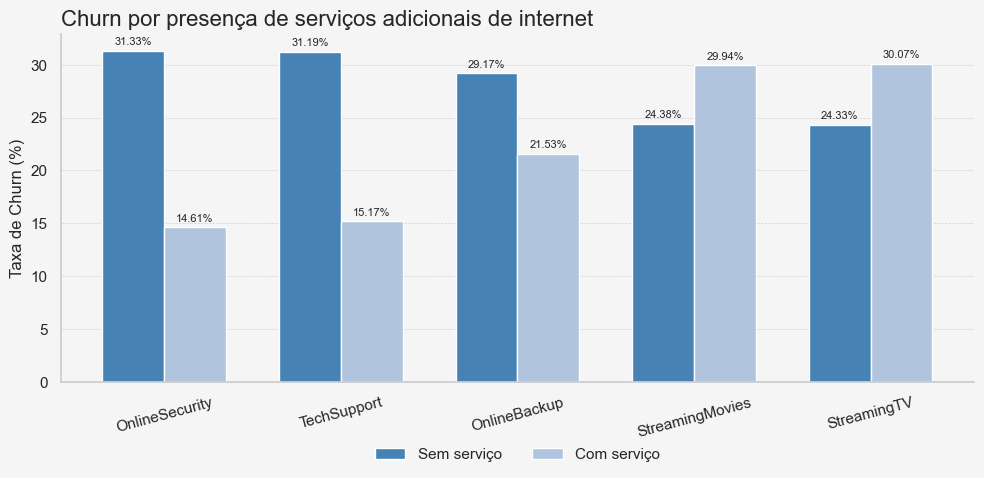

In [137]:
services = ['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']
serv_no = [31.33, 29.17, 31.19, 24.33, 24.38]
serv_yes = [14.61, 21.53, 15.17, 30.07, 29.94]

order = np.argsort(-np.array(serv_no))  # ordena do maior para o menor
services_ord = [services[i] for i in order]
serv_no_ord = [serv_no[i] for i in order]
serv_yes_ord = [serv_yes[i] for i in order]

x = np.arange(len(services))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, serv_no_ord, width, label='Sem serviço', color='steelblue')
bars2 = ax.bar(x + width/2, serv_yes_ord, width, label='Com serviço', color='lightsteelblue')

ax.set_facecolor('whitesmoke')
ax.figure.set_facecolor('whitesmoke')
ax.set_ylabel('Taxa de Churn (%)')
ax.set_title('Churn por presença de serviços adicionais de internet', loc='left', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(services_ord, rotation=15)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
sns.despine(top=True, right=True)

# Rótulos nas barras
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.2f%%', fontsize=8, padding=3)

ax.yaxis.grid(True, color='grey', linestyle='--', linewidth=0.5, alpha=0.3)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig('grafico_churn_servicos_internet.png', dpi=300, bbox_inches='tight')
plt.show()

#### Relação entre serviços adicionais de internet e churn

##### Abaixo estão os dados de cancelamento (`Churn`) cruzados com o uso de serviços adicionais de internet:

| Presença do Serviço | OnlineSecurity | OnlineBackup | TechSupport | StreamingTV | StreamingMovies |
|---------------------|----------------|--------------|-------------|-------------|-----------------|
| **Não**             | 31.33%         | 29.17%       | 31.19%      | 24.33%      | 24.38%          |
| **Sim**             | 14.61%         | 21.53%       | 15.17%      | 30.07%      | 29.94%          |

#### Observações:

##### - Em **todos os casos**, os clientes que **não utilizam** esses serviços estão **muito mais presentes entre os que cancelam**.

##### Porém a tabela mostra que a presença de alguns serviços está fortemente associada à **redução da taxa de churn**, enquanto outros parecem não ter efeito relevante.

##### **Principais destaques:**

##### - **OnlineSecurity** e **TechSupport** são os serviços com maior impacto positivo — as taxas de churn **mais de 50% menores** dentre clientes que os utilizam.
##### - **OnlineBackup** também reduz o churn, porém de forma mais modesta.
##### - Por outro lado, a presença de **StreamingTV** e **StreamingMovies** **não reduz a taxa de churn** — na verdade, a taxa entre quem usa esses serviços é ligeiramente **maior** do que entre os que não utilizam.

##### **Conclusão:** serviços que entregam **valor direto e perceptível em segurança e suporte** parecem contribuir para a retenção do cliente, enquanto serviços de entretenimento **não funcionam como diferencial competitivo** neste caso.

##### **Insight estratégico:** Investir em campanhas que incentivem a adesão a serviços como **OnlineSecurity** e **TechSupport**, especialmente para clientes com contratos curtos e mensalidades altas, pode ser uma ação de impacto direto na **redução do churn**.

#### Relação entre Linha Telefônica, Idade e Churn

In [44]:
phone = (pd.crosstab(df_churn['phone_PhoneService'], df_churn['Churn']).sort_values(by='Yes', ascending=False)).round(2)

phone

Churn,No,Yes
phone_PhoneService,,
Yes,4662,1699
No,512,170


In [45]:
seniors = df[df['customer_SeniorCitizen'] == 1]

phone_percent = (seniors['phone_PhoneService'].value_counts(normalize=True).get('Yes', 0)) * 100
print(f"Percentual de seniors com linha telefonica: {phone_percent:.2f}%")

Percentual de seniors com linha telefonica: 90.89%


In [46]:
seniors = df[df['customer_SeniorCitizen'] == 1]

phone_percent = (seniors['Churn'].value_counts(normalize=True).get('Yes', 0)) * 100
print(f"Percentual de seniors que cancelaram seus planos: {phone_percent:.2f}%")

Percentual de seniors que cancelaram seus planos: 41.68%


##### A grande maioria dos clientes possui linha telefônica:

| Possui linha telefônica | Churn: Não | Churn: Sim |
|-------------------------|------------|------------|
| Sim                     | 4.662      | 1.699      |
| Não                     | 512        | 170        |

##### **A posse de linha telefônica é amplamente difundida**, o que limita seu poder explicativo direto sobre o churn.

##### Entretanto, cruzando com a informação de **idade (clientes idosos/seniors)**, observa-se que:

##### - **90.89%** dos seniors possuem linha telefônica.
##### - **41.68%** dos seniors cancelaram seus planos (**churn elevado**).

##### Isso sugere que, **embora a posse da linha telefônica seja alta entre os seniors**, **ela não impede o cancelamento**. Outros fatores como **tempo de permanência** e **valores cobrados mensalmente** continuam sendo mais determinantes.


### Conclusão da Análise

##### A análise exploratória revelou um cenário importante sobre a evasão de clientes na empresa Telecom X. A taxa de churn identificada na base é de **26,54%**, o que indica que mais de 1 em cada 4 clientes rescindem seu contrato.

##### A permanência média entre os clientes que cancelam é de **aproximadamente 18 meses**, com **mediana de apenas 10 meses**, evidenciando uma **concentração de cancelamentos nos primeiros meses de contrato**. Essa distribuição assimétrica sugere que **o risco de churn é mais elevado no início da jornada do cliente**, o que reforça a importância de ações de engajamento precoce.

##### Além disso, identificou-se que os clientes que cancelam pagam **valores mensais mais altos** em média ($ 74,44), e que **92% dos cancelamentos ocorrem entre clientes com contratos mensais** — o tipo de contrato com menor fidelização. Essa tendência se reforça ao observar que **métodos de pagamento manuais** (como `Electronic check` e `Mailed check`) também estão mais associados ao churn.

##### Outro ponto de atenção envolve os clientes com planos de **fibra óptica**, que concentram grande parte dos cancelamentos, especialmente quando associados a **contratos mensais e mensalidades elevadas**. Isso aponta para uma possível **inadequação entre o valor percebido e o valor cobrado** nesses planos.

##### A análise dos serviços adicionais trouxe insights valiosos: clientes com **serviços de segurança e suporte técnico (OnlineSecurity e TechSupport)** apresentam taxas de churn **mais de 50% menores**, enquanto a presença de serviços de entretenimento como **StreamingTV** e **StreamingMovies** **não contribui para a retenção**. Esses dados sugerem que **benefícios funcionais e de suporte** são mais relevantes para fidelizar o cliente do que ofertas de entretenimento.

---

#### 📌 Recomendações:

##### - **Focar nos primeiros meses** da jornada do cliente com ações de engajamento e acompanhamento.
##### - **Incentivar contratos mais longos e formas de pagamento automáticas**, oferecendo vantagens claras.
##### - **Reavaliar a proposta de valor dos planos com fibra óptica e mensalidades elevadas**, especialmente para o público com maior taxa de cancelamento.
##### - **Incluir ou reforçar serviços de segurança e suporte técnico** nos pacotes oferecidos — eles mostram correlação com maior retenção.

---

##### Esta análise fornece uma base sólida para ações de marketing, retenção e revisão estratégica dos planos e serviços da empresa. O próximo passo pode envolver **modelagem preditiva de churn**, utilizando essas variáveis para antecipar o comportamento do cliente e atuar de forma proativa.
